## SART Analysis
### 1. Data Description

In [2]:
import pandas as pd
df = pd.read_csv('../../../../Analysis/Summary/SART/Data/SART_Summary_32sec.csv')
print(df.describe())

          Stimuli   Attention          MW      NumFix    AvgFixDur  \
count  600.000000  600.000000  600.000000  600.000000   600.000000   
mean     8.000000    0.606667    0.393333   38.506667   681.817037   
std      4.324099    0.488897    0.488897   14.160655   553.228899   
min      1.000000    0.000000    0.000000    0.000000     0.000000   
25%      4.000000    0.000000    0.000000   30.000000   389.482822   
50%      8.000000    1.000000    0.000000   39.000000   558.053221   
75%     12.000000    1.000000    1.000000   48.000000   766.164602   
max     15.000000    1.000000    1.000000   78.000000  5277.777778   

         NumBlink  ClosedEyeDur   AvgPupDia   VarPupDia   AvgSacAmp  \
count  600.000000    600.000000  600.000000  600.000000  600.000000   
mean    15.450000    237.990679    3.828715    0.159166    3.543808   
std     10.044018    214.809378    0.655430    0.152231    1.817745   
min      0.000000      0.000000    2.280015    0.026129    0.000000   
25%      8.000

**被験者別MW率**

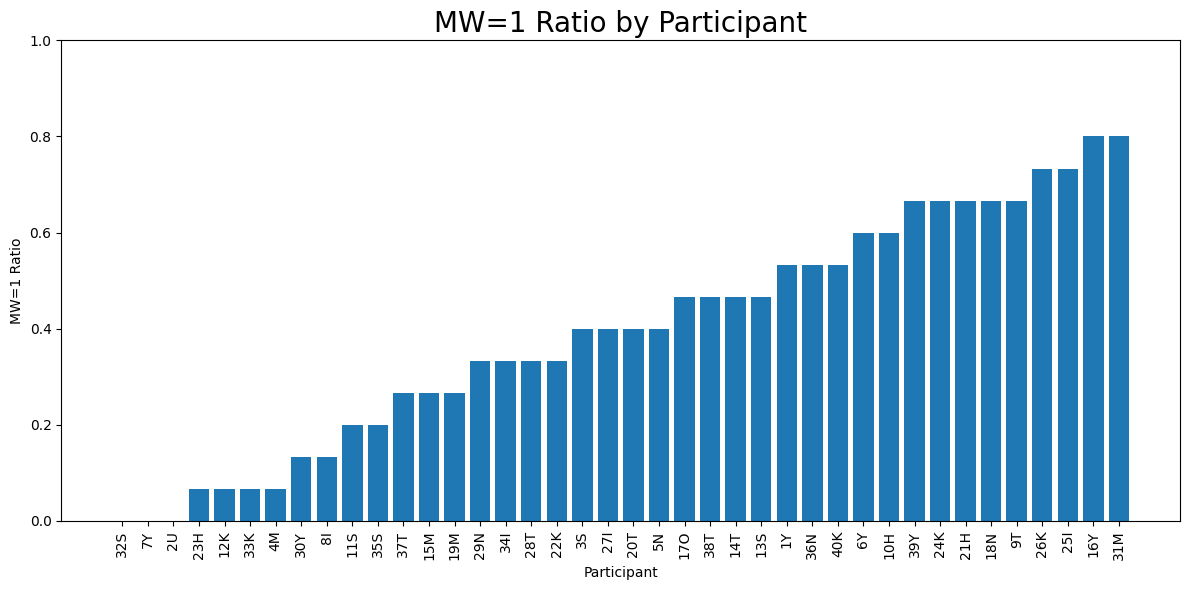

32S    0.000000
7Y     0.000000
2U     0.000000
23H    0.066667
12K    0.066667
33K    0.066667
4M     0.066667
30Y    0.133333
8I     0.133333
11S    0.200000
35S    0.200000
37T    0.266667
15M    0.266667
19M    0.266667
29N    0.333333
34I    0.333333
28T    0.333333
22K    0.333333
3S     0.400000
27I    0.400000
20T    0.400000
5N     0.400000
17O    0.466667
38T    0.466667
14T    0.466667
13S    0.466667
1Y     0.533333
36N    0.533333
40K    0.533333
6Y     0.600000
10H    0.600000
39Y    0.666667
24K    0.666667
21H    0.666667
18N    0.666667
9T     0.666667
26K    0.733333
25I    0.733333
16Y    0.800000
31M    0.800000
dtype: float64
Avg: 0.39333333333333337, Std: 0.24098563043068372, Max: 0.8, Min: 0.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../../../Analysis/Summary/SART/Data/SART_Summary_32sec.csv')

# Create the MW column
df['MW'] = df['Attention'].apply(lambda x: 1 if x == 0 else 0)

# MW Analysis
# Count the number of times each participant had MW=1
mw_counts = df[df['MW'] == 1]['Participant'].value_counts()

# Include all participants, even those with 0 MW counts
all_participants = df['Participant'].unique()
mw_counts_full = pd.Series(0, index=all_participants)
mw_counts_full.update(mw_counts)

# Count total trials for each participant
total_trials = df['Participant'].value_counts()

# Convert MW counts to percentage
mw_percentage = (mw_counts_full / total_trials)

# Sort the data in ascending order
mw_percentage = mw_percentage.sort_values(ascending=True)

# Calculate statistics
mw_avg_full = mw_percentage.mean()
mw_sd_full = mw_percentage.std()
mw_max_full = mw_percentage.max()
mw_min_full = mw_percentage.min()

# Visualize the results with default color and in ascending order
plt.figure(figsize=(12, 6))
plt.bar(mw_percentage.index, mw_percentage.values)
plt.xlabel('Participant')
plt.ylabel('MW=1 Ratio')
plt.title('MW=1 Ratio by Participant', fontsize=20)
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the results
print(mw_percentage, sep='\n')
print(f"Avg: {mw_avg_full}, Std: {mw_sd_full}, Max: {mw_max_full}, Min: {mw_min_full}")


In [ ]:
# データを読み込み
free_viewing_data = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')
sart_data = pd.read_csv('../../../../Analysis/Summary/SART/Data/SART_Summary_32sec.csv')

**FreeViewingとSART課題におけるMW率比較**

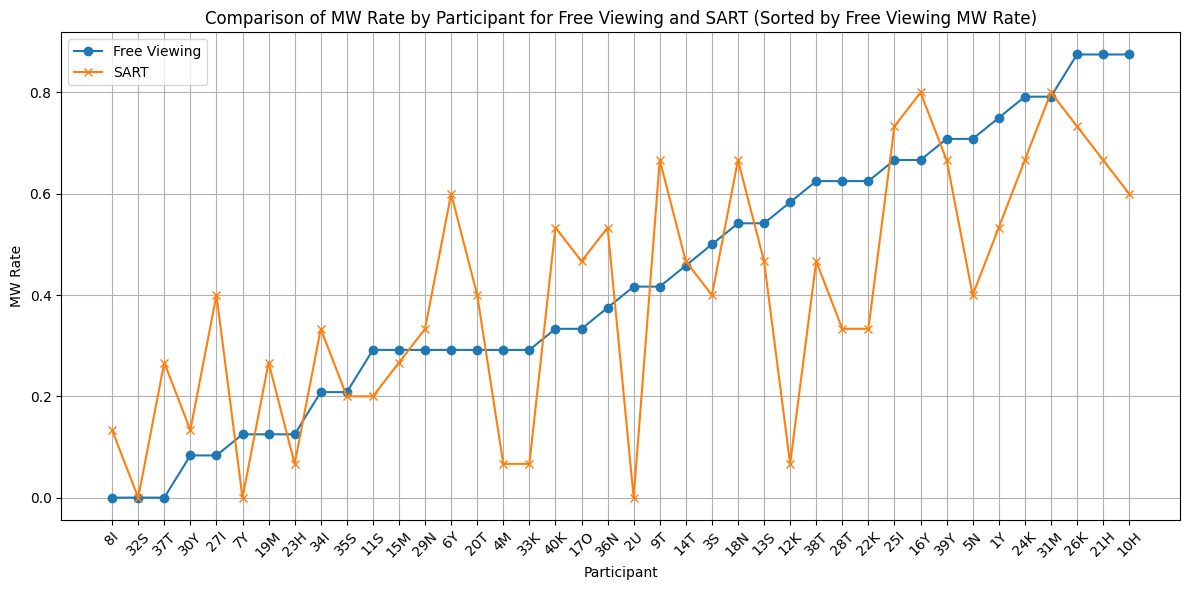

Pearson Correlation: 0.6914646631455721, P-value: 7.799060880745999e-07


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# データを読み込み
free_viewing_data = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')
sart_data = pd.read_csv('../../../../Analysis/Summary/SART/Data/SART_Summary_32sec.csv')

# 被験者ごとのMW率を計算
free_viewing_mw_rate = free_viewing_data.groupby('Participant')['MW'].mean()
sart_mw_rate = sart_data.groupby('Participant')['MW'].mean()

# データフレームにまとめる
mw_rate_comparison = pd.DataFrame({
    'Participant': free_viewing_mw_rate.index,
    'Free Viewing MW Rate': free_viewing_mw_rate.values,
    'SART MW Rate': sart_mw_rate.values
})

# Free ViewingのMW率に基づいて昇順にソート
mw_rate_comparison_sorted_by_free_viewing = mw_rate_comparison.sort_values(by='Free Viewing MW Rate')

# グラフをプロット
plt.figure(figsize=(12, 6))
plt.plot(mw_rate_comparison_sorted_by_free_viewing['Participant'], mw_rate_comparison_sorted_by_free_viewing['Free Viewing MW Rate'], label='Free Viewing', marker='o')
plt.plot(mw_rate_comparison_sorted_by_free_viewing['Participant'], mw_rate_comparison_sorted_by_free_viewing['SART MW Rate'], label='SART', marker='x')
plt.xlabel('Participant')
plt.ylabel('MW Rate')
plt.title('Comparison of MW Rate by Participant for Free Viewing and SART (Sorted by Free Viewing MW Rate)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(mw_rate_comparison['Free Viewing MW Rate'], mw_rate_comparison['SART MW Rate'])
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")


### Identify the best window size using the RF models

**Remove the missing data**

**Remove the missing data, too focused, too MW participants**

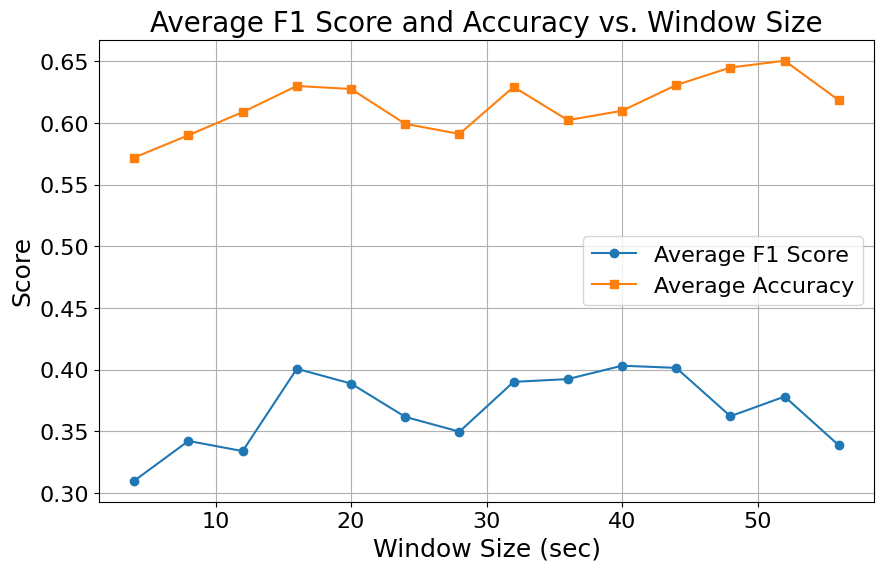

Window size: 4 sec, Average F1 score: 0.310, Average Accuracy: 0.572
Window size: 8 sec, Average F1 score: 0.342, Average Accuracy: 0.590
Window size: 12 sec, Average F1 score: 0.334, Average Accuracy: 0.609
Window size: 16 sec, Average F1 score: 0.401, Average Accuracy: 0.630
Window size: 20 sec, Average F1 score: 0.389, Average Accuracy: 0.627
Window size: 24 sec, Average F1 score: 0.362, Average Accuracy: 0.599
Window size: 28 sec, Average F1 score: 0.350, Average Accuracy: 0.591
Window size: 32 sec, Average F1 score: 0.390, Average Accuracy: 0.629
Window size: 36 sec, Average F1 score: 0.392, Average Accuracy: 0.602
Window size: 40 sec, Average F1 score: 0.403, Average Accuracy: 0.610
Window size: 44 sec, Average F1 score: 0.401, Average Accuracy: 0.631
Window size: 48 sec, Average F1 score: 0.362, Average Accuracy: 0.645
Window size: 52 sec, Average F1 score: 0.378, Average Accuracy: 0.650
Window size: 56 sec, Average F1 score: 0.339, Average Accuracy: 0.618
Best window size (F1 s

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Load CSV files into DataFrames
window_sizes = [i for i in range(4, 57, 4)]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/SART/Data/SART_Summary_{w}sec.csv") for w in window_sizes]

# Blacklist of participants with missing data
blacklist = ["22K", "39Y", "5N", "6Y", "14T", "16Y", "19M"]
# too_focused = ["2U", "7Y", "32S"]
# too_MW = ["16Y", "31M"]
# blacklist.extend(too_focused)
# blacklist.extend(too_MW)
blacklist = list(set(blacklist))


# Function to prepare data by participant, excluding blacklist
def prepare_data(df):
    df_filtered = df[~df['Participant'].isin(blacklist)]
    X = df_filtered.drop(columns=['MW', 'Attention', 'Participant', 'Stimuli'])
    y = df_filtered['MW']
    groups = df_filtered['Participant']
    return X, y, groups

# Number of iterations and random states
iterations = 10
random_states = range(iterations)

# Loop through each DataFrame and random states
results = {w: {'f1_score': [], 'accuracy': []} for w in window_sizes}
for w, df in zip(window_sizes, dataframes):
    X, y, groups = prepare_data(df)
    # Define the cross-validation strategy
    gkf = GroupKFold(n_splits=5)
    
    # Collect cross-validation scores for each random state
    for random_state in random_states:
        clf = RandomForestClassifier(random_state=random_state)
        f1_scorer = make_scorer(f1_score)
        accuracy_scorer = make_scorer(accuracy_score)
        f1_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring=f1_scorer)
        accuracy_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring=accuracy_scorer)
        results[w]['f1_score'].extend(f1_scores)
        results[w]['accuracy'].extend(accuracy_scores)

# Calculate average F1 score and accuracy for each window size
average_results = {w: {'average_f1_score': np.mean(scores['f1_score']), 'average_accuracy': np.mean(scores['accuracy'])} for w, scores in results.items()}

# Convert average_results to a DataFrame for plotting
average_results_df = pd.DataFrame.from_dict(average_results, orient='index').reset_index()
average_results_df.columns = ['window_size', 'average_f1_score', 'average_accuracy']

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(average_results_df['window_size'], average_results_df['average_f1_score'], marker='o', label='Average F1 Score')
plt.plot(average_results_df['window_size'], average_results_df['average_accuracy'], marker='s', label='Average Accuracy')

# Adjust font sizes
plt.xlabel('Window Size (sec)', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.title('Average F1 Score and Accuracy vs. Window Size', fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Print results
for w, metrics in average_results.items():
    print(f"Window size: {w} sec, Average F1 score: {metrics['average_f1_score']:.3f}, Average Accuracy: {metrics['average_accuracy']:.3f}")

# Find the best window size based on F1 score
best_window_f1 = max(average_results, key=lambda w: average_results[w]['average_f1_score'])
print(f"Best window size (F1 score): {best_window_f1} sec with average F1 score: {average_results[best_window_f1]['average_f1_score']:.3f}")


**Plot the confusion matrix, ROC curve, and AUC**

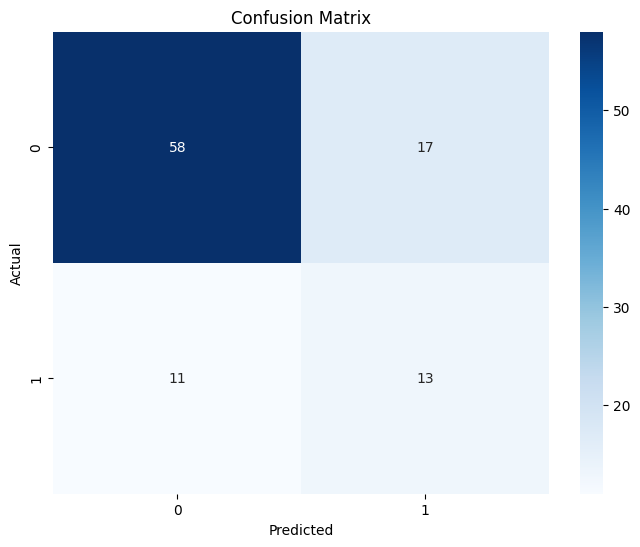

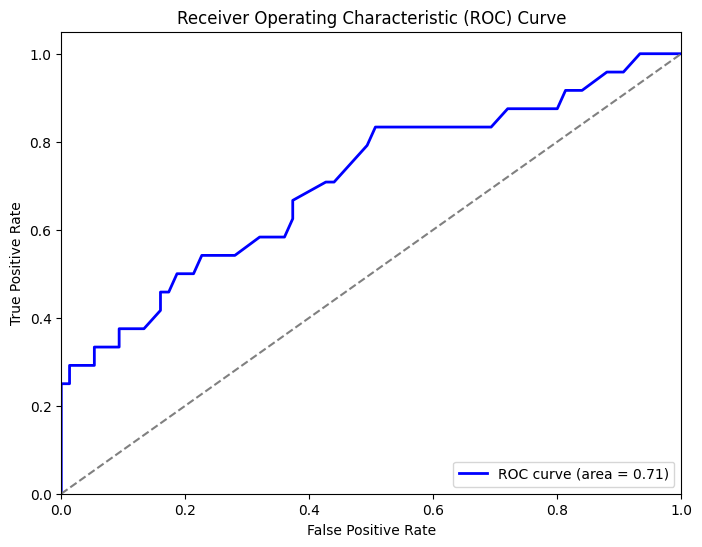

Accuracy: 0.717
F1 score: 0.481
Precision: 0.433
Recall: 0.542
Feature Importances:
nrec: 0.0688
AvgPupDia: 0.0687
ent: 0.0539
NumBlink: 0.0495
lam: 0.0444
relent: 0.0440
AvgFixDur_Sim: 0.0431
AvgFixDisp: 0.0424
ClosedEyeDur: 0.0424
CoveredArea: 0.0418
corm: 0.0408
rec: 0.0402
AvgSacAmp: 0.0397
VarPupDia: 0.0395
revdet: 0.0390
det: 0.0381
AvgFixDisp_Sim: 0.0370
tt: 0.0363
maxline: 0.0353
meanline: 0.0349
LastFixDur: 0.0343
AvgFixDur: 0.0312
NumFix_Sim: 0.0306
NumFix: 0.0240


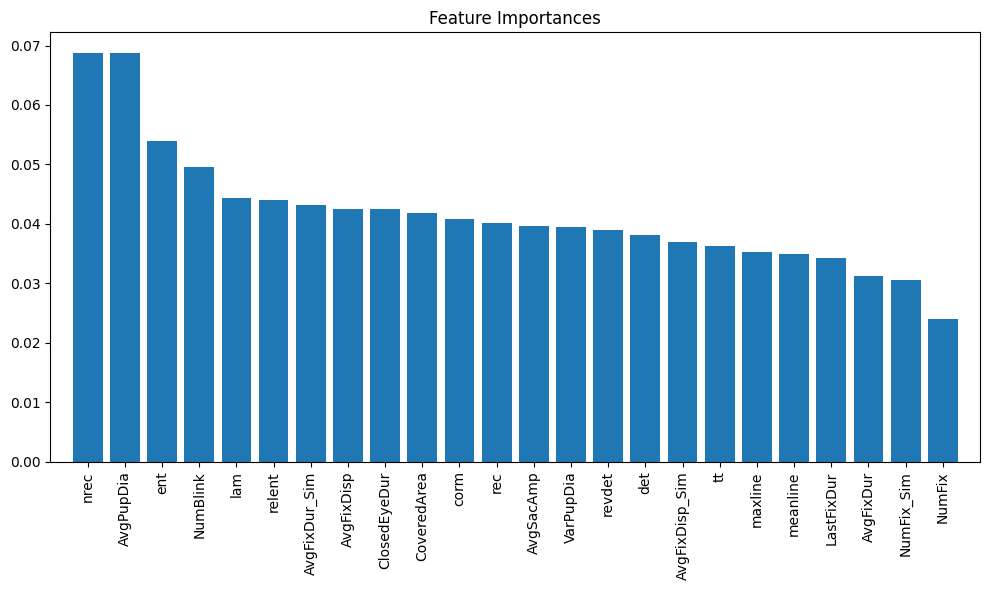

Best Hyperparameters:
clf__max_depth: None
clf__min_samples_leaf: 1
clf__min_samples_split: 2
clf__n_estimators: 100


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GroupKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data for the best window size (30 sec)
window_size = 32
df = pd.read_csv(f"../../../../Analysis/Summary/SART/Data/SART_Summary_{window_size}sec.csv")

# Blacklist of participants with missing data
blacklist = ["22K", "39Y", "5N", "6Y", "14T", "16Y", "19M"]

# Prepare the data
df_filtered = df[~df['Participant'].isin(blacklist)]
X = df_filtered.drop(columns=['MW', 'Attention', 'Participant', 'Stimuli'])
y = df_filtered['MW']
groups = df_filtered['Participant']

# Define the pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}


# Define GroupKFold cross-validator
cv = GroupKFold(n_splits=5)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='f1')
grid_search.fit(X, y, groups=groups)

# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train-test split ensuring stratification by groups
X_train, X_test, y_train, y_test, train_groups, test_groups = train_test_split(X, y, groups, test_size=0.2, stratify=groups, random_state=42)

# Train the best estimator
best_estimator.fit(X_train, y_train)

# Predict on the test set
y_pred = best_estimator.predict(X_test)
y_pred_prob = best_estimator.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Feature importance
importances = best_estimator.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Print feature importance values
print("Feature Importances:")
for feature, importance in zip(features[indices], importances[indices]):
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


### 3. Feature Importance
#### 3.1. Check for Multicollinearity Using the Variance Inflation Factor (VIF)

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv('../../../../Analysis/Summary/SART/Data/SART_Summary_32sec.csv')

# Remove blacklisted participants
blacklist = ["22K", "39Y", "5N", "6Y", "14T", "16Y", "19M"]
df = df[~df['Participant'].isin(blacklist)]

# Prepare the data
X = df.drop(columns=['MW', 'Attention', 'Participant', 'Stimuli'])
y = df['MW']

# Handle missing values by dropping rows with NaNs or infs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

def calculate_vif(X):
    X_with_const = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    return vif_data

# Iteratively remove features with high VIF
max_vif = 10
while True:
    vif_data = calculate_vif(X_scaled)
    if vif_data["VIF"].max() > max_vif:
        feature_to_remove = vif_data.sort_values("VIF", ascending=False).iloc[0]["Feature"]
        if feature_to_remove == "const":
            break
        X_scaled = X_scaled.drop(columns=[feature_to_remove])
        print(f"Removed {feature_to_remove} with VIF {vif_data['VIF'].max()}")
    else:
        break

print(calculate_vif(X_scaled))


Removed ent with VIF 110.04898659207102
Removed tt with VIF 51.094417733219075
Removed revdet with VIF 33.97323449960601
Removed relent with VIF 24.987464360801624
Removed rec with VIF 20.123618847216967
Removed lam with VIF 10.609297989278275
           Feature       VIF
0            const  1.000000
1           NumFix  7.610319
2        AvgFixDur  7.076020
3         NumBlink  2.038437
4     ClosedEyeDur  2.145030
5        AvgPupDia  1.329096
6        VarPupDia  1.585164
7        AvgSacAmp  6.361782
8       AvgFixDisp  9.022425
9       LastFixDur  1.426176
10      NumFix_Sim  4.936951
11  AvgFixDisp_Sim  6.541495
12   AvgFixDur_Sim  2.586611
13     CoveredArea  6.337098
14            nrec  6.388459
15             det  2.539348
16        meanline  6.500762
17         maxline  5.394042
18            corm  2.988927


In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv('../../../../Analysis/Summary/SART/Data/SART_Summary_32sec.csv')

# Remove blacklisted participants
blacklist = ["22K", "39Y", "5N", "6Y", "14T", "16Y", "19M"]
df = df[~df['Participant'].isin(blacklist)]
high_vif_cols = ["ent", "tt", "revdet", "relent", "rec", "lam"]

# Prepare the data
X = df.drop(columns=['MW', 'Attention', 'Participant', 'Stimuli'])
y = df['MW']

# Handle missing values by dropping rows with NaNs or infs
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

# Align y with the cleaned X
y = y.loc[X.index]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# # Drop variables with high VIF values to address multicollinearity
X_normalized_reduced = X_scaled.drop(columns=high_vif_cols)
# X_normalized_reduced = X_scaled

# Add a constant to the model (intercept)
X_normalized_reduced = sm.add_constant(X_normalized_reduced)

# Ensure y is aligned with the final X_normalized_reduced
y = y.loc[X_normalized_reduced.index]

# Fit a logistic regression model
logit_model_reduced = sm.Logit(y, X_normalized_reduced).fit()

# Display the summary of the reduced logistic regression model
print(logit_model_reduced.summary())


Optimization terminated successfully.
         Current function value: 0.599467
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     MW   No. Observations:                  493
Model:                          Logit   Df Residuals:                      474
Method:                           MLE   Df Model:                           18
Date:                Mon, 24 Jun 2024   Pseudo R-squ.:                 0.08966
Time:                        19:37:23   Log-Likelihood:                -295.54
converged:                       True   LL-Null:                       -324.65
Covariance Type:            nonrobust   LLR p-value:                 3.957e-06
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6135      0.102     -6.032      0.000      -0.813      -0.414
NumFix           

- Coefficient Interpretation
    - const: The intercept term is significant (p-value < 0.05), indicating the baseline log-odds of mind wandering when all predictor variables are zero.
    - AvgPupDia: The coefficient is negative and significant (p-value < 0.05), suggesting that larger average pupil diameter decreases the likelihood of mind wandering.
    - nrec: This variable is significant (p-value < 0.01), with a negative coefficient, indicating that higher nrec values are associated with a lower likelihood of mind wandering.

In [41]:
# Drop non-significant variables based on p-values
significant_vars = ['const', 'AvgPupDia', 'nrec']

# Filter the dataset to keep only significant variables
X_significant = X_normalized_reduced[significant_vars]

# Fit a logistic regression model with significant variables
logit_model_significant = sm.Logit(y, X_significant).fit()

# Display the summary of the logistic regression model with significant variables
print(logit_model_significant.summary())


Optimization terminated successfully.
         Current function value: 0.607705
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     MW   No. Observations:                  493
Model:                          Logit   Df Residuals:                      490
Method:                           MLE   Df Model:                            2
Date:                Mon, 24 Jun 2024   Pseudo R-squ.:                 0.07715
Time:                        19:40:59   Log-Likelihood:                -299.60
converged:                       True   LL-Null:                       -324.65
Covariance Type:            nonrobust   LLR p-value:                 1.324e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6027      0.100     -6.018      0.000      -0.799      -0.406
AvgPupDia     -0.2243      0.

- Conclusion

    - AvgPupDia and nrec are significant predictors of mind wandering.
    - Both variables have a negative relationship with mind wandering, meaning higher values of these predictors decrease the likelihood of mind wandering.
    - The reduced model, focusing only on significant variables, simplifies interpretation without sacrificing much predictive power.

- Summary
    - Pupil Diameter as an Indicator of Cognitive Engagement:

        - The average pupil diameter reflects the level of cognitive engagement and arousal.
        - Larger pupils indicate higher cognitive load and attention, while smaller pupils suggest disengagement and mind wandering.
    - Recurrence as a Measure of Eye Movement Stability:

        - Recurrence quantifies the stability and predictability of eye movements.
        - High recurrence values are associated with systematic scanning and focused attention, whereas low recurrence values suggest erratic eye movements and mind wandering.

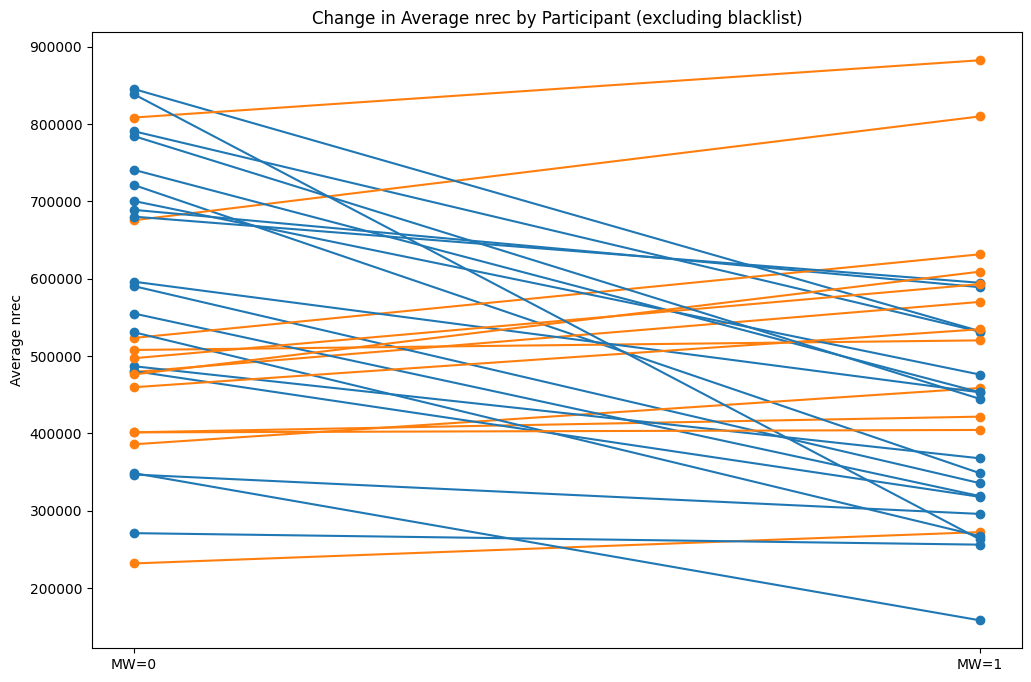

Number of participants with inclined lines: 12
Number of participants with declined lines: 18
Mean nrec for MW=0: 595192.2596754057
Standard deviation for MW=0: 262649.69663737493
Mean nrec for MW=1: 439657.28597449913
Standard deviation for MW=1: 224941.9531928354
T-test results: t-statistic = 6.5344718794000665 , p-value = 1.73888921880375e-10
The difference in mean nrec between MW=0 and MW=1 is statistically significant.


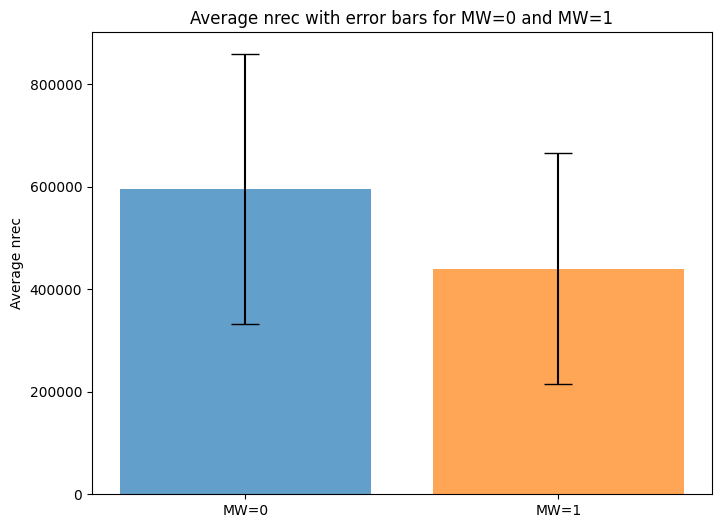

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_csv('../../../../Analysis/Summary/SART/Data/SART_Summary_32sec.csv')

# Blacklist definition
blacklist = ["22K", "39Y", "5N", "6Y", "14T", "16Y", "19M", "2U", "7Y", "32S"]

# Extract necessary columns
df_subset_nrec = df[['Participant', 'MW', 'nrec']]

# Exclude participants in the blacklist
df_filtered = df_subset_nrec[~df_subset_nrec['Participant'].isin(blacklist)]

# Calculate average nrec for each participant grouped by MW
average_nrec = df_filtered.groupby(['Participant', 'MW'])['nrec'].mean().unstack()

# Initialize counters
inclined_count = 0
declined_count = 0

# Plot the changes in average nrec
fig, ax = plt.subplots(figsize=(12, 8))

for index, row in average_nrec.iterrows():
    if row[0] < row[1]:
        color = 'C1'
        inclined_count += 1
    else:
        color = 'C0'
        declined_count += 1
    ax.plot([0, 1], [row[0], row[1]], marker='o', color=color)

# Set labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['MW=0', 'MW=1'])
ax.set_ylabel('Average nrec')
ax.set_title('Change in Average nrec by Participant (excluding blacklist)')

# Show the plot
plt.show()

# Print the counts
print("Number of participants with inclined lines:", inclined_count)
print("Number of participants with declined lines:", declined_count)

# Calculate mean and standard deviation for MW=0 and MW=1
mean_nrec_MW0 = df_filtered[df_filtered['MW'] == 0]['nrec'].mean()
std_nrec_MW0 = df_filtered[df_filtered['MW'] == 0]['nrec'].std()
mean_nrec_MW1 = df_filtered[df_filtered['MW'] == 1]['nrec'].mean()
std_nrec_MW1 = df_filtered[df_filtered['MW'] == 1]['nrec'].std()

print("Mean nrec for MW=0:", mean_nrec_MW0)
print("Standard deviation for MW=0:", std_nrec_MW0)
print("Mean nrec for MW=1:", mean_nrec_MW1)
print("Standard deviation for MW=1:", std_nrec_MW1)

# Perform t-test
t_stat, p_value = ttest_ind(df_filtered[df_filtered['MW'] == 0]['nrec'], df_filtered[df_filtered['MW'] == 1]['nrec'])
print("T-test results: t-statistic =", t_stat, ", p-value =", p_value)

if p_value < 0.05:
    print("The difference in mean nrec between MW=0 and MW=1 is statistically significant.")
else:
    print("The difference in mean nrec between MW=0 and MW=1 is not statistically significant.")

# Bar plot with error bars
labels = ['MW=0', 'MW=1']
means = [mean_nrec_MW0, mean_nrec_MW1]
errors = [std_nrec_MW0, std_nrec_MW1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, means, yerr=errors, capsize=10, color=['C0', 'C1'], alpha=0.7, ecolor='black')
ax.set_ylabel('Average nrec')
ax.set_title('Average nrec with error bars for MW=0 and MW=1')

plt.show()


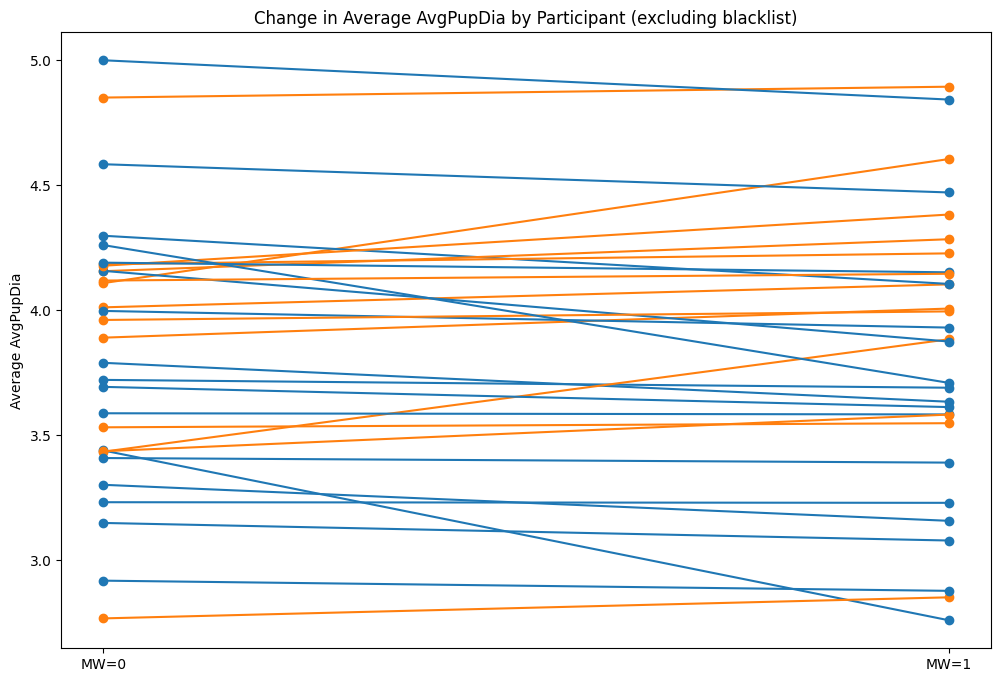

Number of participants with inclined lines: 13
Number of participants with declined lines: 17
Mean AvgPupDia for MW=0: 3.86722149141773
Standard deviation for MW=0: 0.5559045870300963
Mean AvgPupDia for MW=1: 3.735920129513698
Standard deviation for MW=1: 0.6464036550337633
T-test results: t-statistic = 2.302043216095173 , p-value = 0.021790525912146884
The difference in mean AvgPupDia between MW=0 and MW=1 is statistically significant.


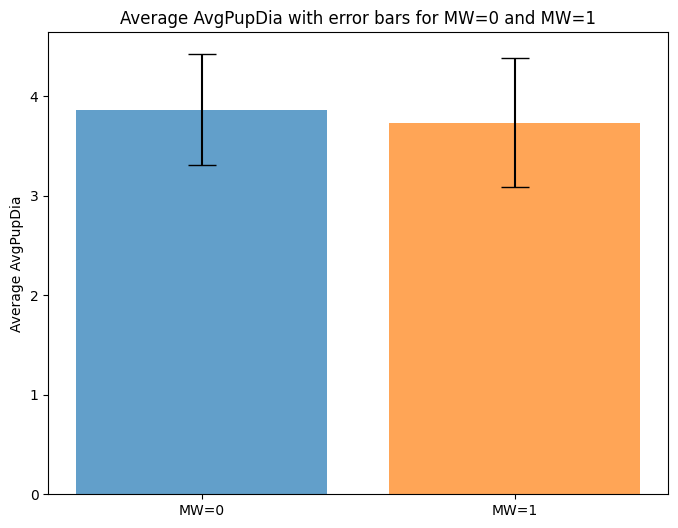

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_csv('../../../../Analysis/Summary/SART/Data/SART_Summary_32sec.csv')

# Blacklist definition
blacklist = ["22K", "39Y", "5N", "6Y", "14T", "16Y", "19M", "2U", "7Y", "32S"]

# Extract necessary columns for AvgPupDia
df_subset_avgpupdia = df[['Participant', 'MW', 'AvgPupDia']]

# Exclude participants in the blacklist
df_filtered_avgpupdia = df_subset_avgpupdia[~df_subset_avgpupdia['Participant'].isin(blacklist)]

# Calculate average AvgPupDia for each participant grouped by MW
average_avgpupdia = df_filtered_avgpupdia.groupby(['Participant', 'MW'])['AvgPupDia'].mean().unstack()

# Initialize counters
inclined_count = 0
declined_count = 0

# Plot the changes in average AvgPupDia
fig, ax = plt.subplots(figsize=(12, 8))

for index, row in average_avgpupdia.iterrows():
    if row[0] < row[1]:
        color = 'C1'
        inclined_count += 1
    else:
        color = 'C0'
        declined_count += 1
    ax.plot([0, 1], [row[0], row[1]], marker='o', color=color)

# Set labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['MW=0', 'MW=1'])
ax.set_ylabel('Average AvgPupDia')
ax.set_title('Change in Average AvgPupDia by Participant (excluding blacklist)')

# Show the plot
plt.show()

# Print the counts
print("Number of participants with inclined lines:", inclined_count)
print("Number of participants with declined lines:", declined_count)

# Calculate mean and standard deviation for MW=0 and MW=1
mean_avgpupdia_MW0 = df_filtered_avgpupdia[df_filtered_avgpupdia['MW'] == 0]['AvgPupDia'].mean()
std_avgpupdia_MW0 = df_filtered_avgpupdia[df_filtered_avgpupdia['MW'] == 0]['AvgPupDia'].std()
mean_avgpupdia_MW1 = df_filtered_avgpupdia[df_filtered_avgpupdia['MW'] == 1]['AvgPupDia'].mean()
std_avgpupdia_MW1 = df_filtered_avgpupdia[df_filtered_avgpupdia['MW'] == 1]['AvgPupDia'].std()

print("Mean AvgPupDia for MW=0:", mean_avgpupdia_MW0)
print("Standard deviation for MW=0:", std_avgpupdia_MW0)
print("Mean AvgPupDia for MW=1:", mean_avgpupdia_MW1)
print("Standard deviation for MW=1:", std_avgpupdia_MW1)

# Perform t-test
t_stat, p_value = ttest_ind(df_filtered_avgpupdia[df_filtered_avgpupdia['MW'] == 0]['AvgPupDia'], df_filtered_avgpupdia[df_filtered_avgpupdia['MW'] == 1]['AvgPupDia'])
print("T-test results: t-statistic =", t_stat, ", p-value =", p_value)

if p_value < 0.05:
    print("The difference in mean AvgPupDia between MW=0 and MW=1 is statistically significant.")
else:
    print("The difference in mean AvgPupDia between MW=0 and MW=1 is not statistically significant.")

# Bar plot with error bars
labels = ['MW=0', 'MW=1']
means = [mean_avgpupdia_MW0, mean_avgpupdia_MW1]
errors = [std_avgpupdia_MW0, std_avgpupdia_MW1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, means, yerr=errors, capsize=10, color=['C0', 'C1'], alpha=0.7, ecolor='black')
ax.set_ylabel('Average AvgPupDia')
ax.set_title('Average AvgPupDia with error bars for MW=0 and MW=1')

plt.show()
